In [13]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *
from sklearn.model_selection import train_test_split
import pandas as pd

In [14]:
ratings = pd.read_csv('./movielens_dataset/u.data', header= None , sep = '\t')
ratings.columns = ['user_id' , 'movie_id' , 'rating' , 'timestamp']

In [15]:
train_set, test_set = train_test_split(ratings, test_size=0.20, random_state=1337)

print(train_set.shape)
print(test_set.shape)

(80000, 4)
(20000, 4)


In [16]:
data = CollabDataBunch.from_df(train_set, seed=1337, valid_pct=0.2)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


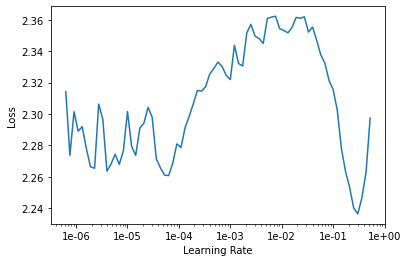

In [17]:
learn = collab_learner(data, n_factors=50, y_range=(0, 5))
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [18]:
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,time
0,2.352736,2.332197,00:03
1,2.327092,2.325926,00:03
2,2.319125,2.314932,00:03
3,2.329402,2.303238,00:04
4,2.254676,2.292717,00:04
5,2.302350,2.284279,00:04
6,2.298812,2.278378,00:03
7,2.272577,2.275030,00:03
8,2.284742,2.273706,00:03
9,2.264677,2.273509,00:04


In [19]:
ratings['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


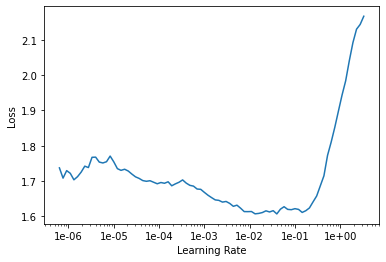

In [20]:
learn = collab_learner(data, use_nn=True, emb_szs={'user_id': 50, 'movie_id': 50}, layers=[256, 128], y_range=(1, 5))
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,time
0,0.988469,0.949252,00:07
1,0.916345,0.881043,00:07
2,0.779109,0.868811,00:07


In [24]:
learn.save('./model-fastai')

In [25]:
test_data = CollabDataBunch.from_df(train_set, test=test_set, seed=1337, valid_pct=0.2)
test_data.show_batch()
test_learn = collab_learner(test_data, use_nn=True, emb_szs={'user_id': 50, 'movie_id': 50}, layers=[256, 128], y_range=(0, 5))
learn_loaded = test_learn.load('./model-fastai')

user_id,movie_id,target
352,692,3.0
664,149,3.0
589,243,3.0
299,730,4.0
197,880,3.0


In [26]:
preds, y = learn_loaded.get_preds(DatasetType.Test)

In [29]:
from sklearn.metrics import mean_squared_error

movies = test_set[['movie_id', 'rating']]

mse = mean_squared_error(preds, movies['rating'], squared=True)
mse

1.045871264369715